In [1]:
import sys
sys.path.append("..")
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
from writeit import rewritePipes
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def idx_t(i,j,n,N):
    return (2*(N+2)*n+(N+2)*i+j)

In [22]:
mtype =1
Np=2
Mrs = [0.002]*Np
Ds = [1.]*Np
jt = [1,2,1]
bt = [1,1,1]
bv = [0,0,0]
r =  [-1,0,1]
h0s =[0.]*Np
q0s =[0.]*Np

Ls = [100.,100]
Ns = [int(L) for L in Ls]
T = 60
M = 7200
Mi =10
a = 100
elevs = [0,0,0]
H = []
N = Ns[0]
dt = T/float(M)
A0 = 0.792325375237 #corresponds to H = 10(verify?)
Qin = A0*np.ones(M+1)
a0 = A0*np.ones(N+1)
q0 = np.ones(N+1)
q1 = np.zeros(N+1)
fn = "../indata/testfill"
oldinp = "../indata/2pipes.inp"
for ii in range(5):
    a1 = .1*ii*np.ones(N+1)
    (fi, fc) = rewritePipes(fn,oldinp, Ns, Ls, Mrs, Ds, jt, bt, bv, r, h0s, q0s, T, M, a,elevs)
    n0 = PyNetwork(fi, fc, mtype)
    n0.setIC(0,a0,q0)
    n0.setIC(1,a1,q1)
    n0.setbVal(0,Qin)
    n0.runForwardProblem(dt) 
    print "Inflow Volume = %.2f"%n0.getTotalVolume()
    p0 = PyPipe_ps(Ns[0], Ds[0], Ls[0], M, a)
    qf = n0.qhist(1)
    Nstar = 10
    H.append([p0.pbar(qf[idx_t(0,Nstar,n,Ns[0])],False) for n in range(M+1)])

new files are ../indata/testfill.inp and ../indata/testfill.config
Inflow Volume = 159.34
new files are ../indata/testfill.inp and ../indata/testfill.config
Inflow Volume = 159.58
new files are ../indata/testfill.inp and ../indata/testfill.config
Inflow Volume = 159.89
new files are ../indata/testfill.inp and ../indata/testfill.config
Inflow Volume = 160.08
new files are ../indata/testfill.inp and ../indata/testfill.config
Inflow Volume = 160.44


(0, 25)

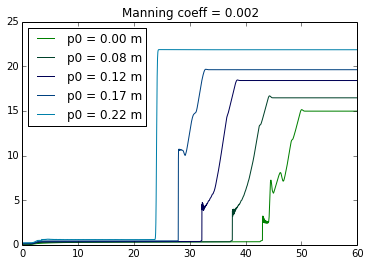

In [23]:
from matplotlib import cm
import matplotlib.colors as colors
cmap = cm.get_cmap('ocean')
cnorm =colors.Normalize(vmin=0, vmax = len(H)+1)
scalarMap = cm.ScalarMappable(norm =cnorm, cmap= cmap)
t = np.linspace(0,n0.T,n0.M+1)
for kk in range(len(H)):
    cval = scalarMap.to_rgba(kk)
    plot(t,H[kk],color = cval, label = "p0 = %.2f m"%p0.pbar(.1*kk,False))
legend(loc = "upper left")
title("Manning coeff = %.3f"%Mrs[1])
gca().set_ylim(0,25)

In [24]:
print p0.AofH(10,True)
print p0.HofA(A0,True)

0.792325375237
10.0000001486


In [21]:
n0.cmax

[100.00000000000024, 100.00000000000016]

In [37]:
dx = Ls[0]/Ns[0]

In [38]:
print n0.cmax[0]*dt/dx

0.833333333333
